# Climate Risk and Disaster Management Analysis
## Data Analysis Project

This notebook analyzes natural disasters data to understand patterns and impacts of climate-related disasters worldwide. We'll explore various aspects of natural disasters, their frequency, and their effects on different regions.

# Assessing the Escalating Impact of Climate-Driven Disasters for the Advancement of Robust Disaster Risk Reduction Strategies
## AICTE Internship Project

This project represents a comprehensive analysis of climate-driven disasters, aiming to unravel the intricate challenges posed by climate-induced catastrophes. Through advanced data analytics, we examine the escalating frequency and severity of:
- Floods
- Storms
- Wildfires
- Extreme Temperatures

The analysis quantifies critical metrics including:
- Total deaths
- Affected populations
- Financial damages

Our objective is to forge a robust framework for Disaster Risk Reduction (DRR) that empowers stakeholders with actionable insights for developing resilient strategies.

## Week 1: Initial Data Understanding

In Week 1, we:
1. Selected Climate Risk and Disaster Management as our focus area
2. Acquired relevant dataset from Kaggle
3. Performed initial data exploration:
   - Imported necessary libraries
   - Loaded the dataset
   - Examined basic statistics and structure
   - Identified missing values

Now in Week 2, we advance to detailed EDA, data transformation, and feature selection.

In [114]:
# Week 1: Initial Data Exploration
import pandas as pd
import numpy as np

# Load the dataset
try:
    df = pd.read_csv(r'C:\Users\ADWAITH CM\Climate week\natural_disasters.csv', encoding='latin-1')
except:
    df = pd.read_csv(r'C:\Users\ADWAITH CM\Climate week\data2.csv', encoding='latin-1')

# Display basic information about the dataset
print("Dataset Information:")
print("-" * 50)
df.info()

print("\nBasic Statistics:")
print("-" * 50)
print(df.describe())

print("\nMissing Values:")
print("-" * 50)
print(df.isnull().sum())

Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent       

## 1. Import Required Libraries

First, we'll import all the necessary Python libraries for our analysis:

In [115]:
# Check if packages are installed and import them
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    print("All required packages are already installed!")
except ImportError:
    print("Installing required packages...")
    import pip
    pip.main(['install', 'pandas', 'numpy', 'matplotlib', 'seaborn'])
    print("Packages installed successfully!")

All required packages are already installed!


In [116]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('default')  # Using default style instead
sns.set_theme()  # Apply seaborn theme

# Display all columns in dataframe
pd.set_option('display.max_columns', None)

## 2. Load the Dataset

We'll be using the Natural Disasters Dataset located in the DISASTERS folder. We have two datasets available:
- natural_disasters.csv
- data2.csv

Let's start by analyzing the main dataset (natural_disasters.csv).

In [117]:
# Set the file path to the dataset
file_path = 'natural_disasters.csv'  # Dataset should be in the same folder as notebook

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,Location,Origin,Associated Dis,Associated Dis2,OFDA Response,Appeal,Declaration,Aid Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Local Time,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,CPV,Western Africa,Africa,Countrywide,NaN,Famine,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,IND,Southern Asia,Asia,Bengal,NaN,NaN,NaN,NaN,No,No,NaN,NaN,Km2,NaN,NaN,NaN,NaN,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,GTM,Central America,Americas,"Quezaltenango, San Marcos",NaN,Tsunami/Tidal wave,NaN,NaN,NaN,NaN,NaN,8.0,Richter,14,-91,20:20,NaN,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,GTM,Central America,Americas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


## 3. Explore the Dataset with .info()

The `.info()` function tells us important details about our dataset:
- Total number of rows (entries)
- Column names
- Data type of each column (int64, float64, object, etc.)
- Number of non-null values in each column
- Memory usage

This helps us understand:
1. How big our dataset is
2. What kind of data is in each column
3. If any columns have missing data

In [118]:
# Display basic information about the dataset
print("\nDataset Information:")
print("-------------------")
df.info()


Dataset Information:
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  ob

## 4. Check for Missing Values with .isnull().sum()

The `.isnull().sum()` command helps us find missing data:
- Shows each column name
- Counts how many missing values (NaN or None) are in each column
- A value of 0 means no missing data in that column
- Higher numbers indicate missing data that we might need to handle

This is important because:
1. Missing data can affect our analysis
2. We might need to fill or remove missing values
3. It helps us assess data quality

In [119]:
# Check for missing values
print("Missing Values Count:")
print("--------------------")
print(df.isnull().sum())

Missing Values Count:
--------------------
Year                              0
Seq                               0
Glide                         14545
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               3110
Disaster Subsubtype           15049
Event Name                    12265
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1792
Origin                        12332
Associated Dis                12778
Associated Dis2               15419
OFDA Response                 14432
Appeal                        13557
Declaration                   12870
Aid Contribution              15449
Dis Mag Value                 11180
Dis Mag Scale                  1190
Latitude                      13397
Longitude                     13394
Local Time                    15023
River Basin          

## 5. Basic Statistical Summary with .describe()

The `.describe()` function gives us statistical information about numerical columns:
- count: number of non-null values
- mean: average value
- std: standard deviation (spread of data)
- min: minimum value
- 25%: first quartile
- 50%: median (middle value)
- 75%: third quartile
- max: maximum value

This helps us understand:
1. The range of our data
2. If there are unusual values (outliers)
3. How the data is distributed

In [120]:
# Generate descriptive statistics
print("Descriptive Statistics:")
print("----------------------")
display(df.describe())

Descriptive Statistics:
----------------------


,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,16126.000000,16126.000000,6.770000e+02,4.946000e+03,16126.00000,15739.000000,12498.000000,16126.000000,15418.000000,12570.000000,1.141300e+04,3.895000e+03,9.220000e+03,2.430000e+03,1.161700e+04,1.096000e+03,5.245000e+03,15811.000000
mean,1996.764790,714.784820,1.254136e+05,4.735038e+04,1996.77837,6.444374,15.233957,1996.835607,6.576728,15.775020,2.842866e+03,2.621102e+03,8.823612e+05,7.329314e+04,7.165088e+05,7.986514e+05,7.247835e+05,63.215103
std,20.159065,1929.635089,2.997875e+06,3.094242e+05,20.15571,3.393965,8.953821,20.143010,3.352965,8.865486,6.860595e+04,3.440343e+04,8.573913e+06,5.230058e+05,7.718598e+06,3.057638e+06,4.723131e+06,26.734285
min,1900.000000,1.000000,1.000000e+00,-5.700000e+01,1900.00000,1.000000,1.000000,1900.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,3.221647
25%,1989.000000,93.000000,1.750000e+02,7.000000e+00,1989.00000,4.000000,7.000000,1989.000000,4.000000,8.000000,6.000000e+00,1.400000e+01,1.244750e+03,5.725000e+02,6.500000e+02,5.000000e+04,8.300000e+03,45.692897
50%,2001.000000,270.000000,7.210000e+02,1.515000e+02,2001.00000,7.000000,15.000000,2001.000000,7.000000,16.000000,2.000000e+01,5.000000e+01,1.000000e+04,3.000000e+03,5.965000e+03,1.725000e+05,6.000000e+04,68.415379
75%,2011.000000,486.000000,3.511000e+03,1.129650e+04,2011.00000,9.000000,23.000000,2011.000000,9.000000,23.000000,6.300000e+01,2.000000e+02,9.182300e+04,1.750000e+04,5.825500e+04,5.000000e+05,3.173000e+05,84.252733
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.00000,12.000000,31.000000,2021.000000,12.000000,31.000000,3.700000e+06,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,6.000000e+07,2.100000e+08,100.000000


## Data Exploration Analysis

Based on the exploratory data analysis performed above, we can observe several key aspects of our natural disasters dataset:

### Dataset Structure
- Examined the dataset's fundamental composition using `.info()`
- Analyzed the data types of each variable
- Verified the completeness of records across all features

### Data Quality Assessment
- Conducted missing value analysis using `.isnull().sum()`
- Identified potential data gaps or inconsistencies
- Evaluated data completeness for each feature

### Statistical Overview
- Performed descriptive statistical analysis using `.describe()`
- Examined the distribution of numerical variables
- Identified key statistical measures including central tendency and dispersion

This initial exploration provides the foundation for further in-depth analysis of climate-related disaster patterns and their impacts.

## Analysis of Secondary Dataset (data2.csv)

To ensure comprehensive analysis of all available data, let's examine our second dataset using the same systematic approach.

In [55]:
# Load the second dataset
file_path_2 = 'data2.csv'  # Dataset should be in the same folder as notebook
df2 = pd.read_csv(file_path_2)

# Display the first few rows of the second dataset
print("\nFirst few rows of data2.csv:")
print("---------------------------")
display(df2.head())


First few rows of data2.csv:
---------------------------


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [56]:
# Display information about the second dataset
print("\nDataset Information (data2.csv):")
print("------------------------------")
df2.info()


Dataset Information (data2.csv):
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Disaster Subtype                 11897 non-null  object 
 8   Disaster Subsubtype              1044 non-null   object 
 9   Event Name                       3645 non-null   object 
 10  Country                          14644 non-null  object 
 11  ISO            

In [121]:
# Check for missing values in the second dataset
print("\nMissing Values Count (data2.csv):")
print("-------------------------------")
print(df2.isnull().sum())


Missing Values Count (data2.csv):
-------------------------------
Dis No                                 0
Year                                   0
Seq                                    0
Glide                              13063
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2747
Disaster Subsubtype                13600
Event Name                         10999
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1346
Origin                             10864
Associated Dis                     11412
Associated Dis2                    13946
OFDA Response                      13194
Appeal                             12204
Declaration                        11517
Aid Contribution                   13967
Dis Mag Value                  

In [122]:
# Generate descriptive statistics for the second dataset
print("\nDescriptive Statistics (data2.csv):")
print("--------------------------------")
display(df2.describe())


Descriptive Statistics (data2.csv):
--------------------------------


,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,14644.000000,14644.000000,6.770000e+02,4.569000e+03,14644.000000,14376.000000,11577.000000,14644.000000,14095.000000,11650.000000,10199.000000,3.651000e+03,8.846000e+03,2.249000e+03,1.104100e+04,3.100000e+01,1.094000e+03,4.863000e+03,14329.000000
mean,2001.596422,731.604958,1.254136e+05,5.093532e+04,2001.606323,6.411241,15.207912,2001.655763,6.549273,15.792618,361.813119,2.486686e+03,8.889099e+05,7.229559e+04,7.277392e+05,2.392251e+06,7.999424e+05,7.746866e+05,68.762532
std,12.538572,1912.021531,2.997875e+06,3.211007e+05,12.535872,3.393997,8.964592,12.537387,3.351351,8.872079,6495.045853,3.402404e+04,8.680288e+06,5.271422e+05,7.851210e+06,5.229397e+06,3.060283e+06,4.901266e+06,21.429182
min,1970.000000,1.000000,1.000000e+00,-5.700000e+01,1970.000000,1.000000,1.000000,1970.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,8.400000e+01,3.400000e+01,2.000000e+00,15.001282
25%,1993.000000,130.000000,1.750000e+02,7.000000e+00,1993.000000,4.000000,7.000000,1993.000000,4.000000,8.000000,5.000000,1.200000e+01,1.200000e+03,5.140000e+02,6.320000e+02,1.200000e+04,5.000000e+04,1.000000e+04,55.816107
50%,2003.000000,304.000000,7.210000e+02,1.800000e+02,2003.000000,7.000000,15.000000,2003.000000,7.000000,16.000000,16.000000,5.000000e+01,1.000000e+04,3.000000e+03,5.736000e+03,1.940000e+05,1.725000e+05,7.100000e+04,69.500473
75%,2012.000000,503.000000,3.511000e+03,1.515000e+04,2012.000000,9.000000,23.000000,2012.000000,9.000000,24.000000,50.000000,2.000000e+02,8.855250e+04,1.600000e+04,5.600000e+04,1.520376e+06,5.000000e+05,3.500000e+05,86.912465
max,2021.000000,9881.000000,7.800000e+07,1.302587e+07,2021.000000,12.000000,31.000000,2021.000000,12.000000,31.000000,300000.000000,1.800000e+06,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,6.000000e+07,2.100000e+08,100.000000


## Week 2 Setup and Requirements

This notebook requires the following Python libraries:
- pandas for data analysis
- matplotlib for basic plotting
- seaborn for advanced visualizations

If any libraries are missing, run these commands in the VS Code terminal:
```bash
pip install pandas matplotlib seaborn
```

In [123]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configure plot settings (avoiding seaborn style to prevent errors)
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

# Define file paths
data_path = r'C:\Users\ADWAITH CM\Climate week'
primary_file = os.path.join(data_path, 'natural_disasters.csv')
backup_file = os.path.join(data_path, 'data2.csv')

# Load and filter dataset with error handling
try:
    # Try primary dataset first
    df = pd.read_csv(primary_file, encoding='latin-1')
    print("Successfully loaded primary dataset: natural_disasters.csv")
except Exception as e:
    try:
        # Try backup dataset if primary fails
        df = pd.read_csv(backup_file, encoding='latin-1')
        print("Fallback: loaded backup dataset: data2.csv")
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        raise

# Filter for climate-driven disasters
climate_disasters = ['Flood', 'Storm', 'Wildfire', 'Extreme temperature']
df_climate = df[df['Disaster Type'].isin(climate_disasters)].copy()

# Clean column names and convert to numeric where needed
numeric_cols = ['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
for col in numeric_cols:
    if col in df_climate.columns:
        df_climate[col] = pd.to_numeric(df_climate[col], errors='coerce')

# Print dataset information
print("\nDataset loaded and filtered successfully.")
print(f"Total rows: {len(df_climate)}")
print(f"Total columns: {len(df_climate.columns)}")
print("\nColumns available:")
for col in df_climate.columns:
    print(f"- {col}")

print("\nFirst few rows of the dataset:")
print(df_climate.head())

Successfully loaded primary dataset: natural_disasters.csv

Dataset loaded and filtered successfully.
Total rows: 10518
Total columns: 45

Columns available:
- Year
- Seq
- Glide
- Disaster Group
- Disaster Subgroup
- Disaster Type
- Disaster Subtype
- Disaster Subsubtype
- Event Name
- Country
- ISO
- Region
- Continent
- Location
- Origin
- Associated Dis
- Associated Dis2
- OFDA Response
- Appeal
- Declaration
- Aid Contribution
- Dis Mag Value
- Dis Mag Scale
- Latitude
- Longitude
- Local Time
- River Basin
- Start Year
- Start Month
- Start Day
- End Year
- End Month
- End Day
- Total Deaths
- No Injured
- No Affected
- No Homeless
- Total Affected
- Insured Damages ('000 US$)
- Total Damages ('000 US$)
- CPI
- Adm Level
- Admin1 Code
- Admin2 Code
- Geo Locations

First few rows of the dataset:
    Year  Seq Glide Disaster Group Disaster Subgroup Disaster Type  \
7   1904    3   NaN        Natural    Meteorological         Storm   
12  1906   23   NaN        Natural      Hydrolo

In [124]:
# Verify data quality and handle missing values
print("Data Quality Check")
print("-" * 50)

# Check for missing values
print("\nMissing values in each column:")
missing_values = df_climate.isnull().sum()
print(missing_values)

# Check data types
print("\nData types of each column:")
print(df_climate.dtypes)

# Basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
print(df_climate.describe())

Data Quality Check
--------------------------------------------------

Missing values in each column:
Year                              0
Seq                               0
Glide                          9448
Disaster Group                    0
Disaster Subgroup                 0
Disaster Type                     0
Disaster Subtype               2889
Disaster Subsubtype            9456
Event Name                     8182
Country                           0
ISO                               0
Region                            0
Continent                         0
Location                       1056
Origin                         7208
Associated Dis                 7951
Associated Dis2                9918
OFDA Response                  9482
Appeal                         9298
Declaration                    8761
Aid Contribution              10028
Dis Mag Value                  7429
Dis Mag Scale                     0
Latitude                       9410
Longitude                      940

Testing visualization capabilities...


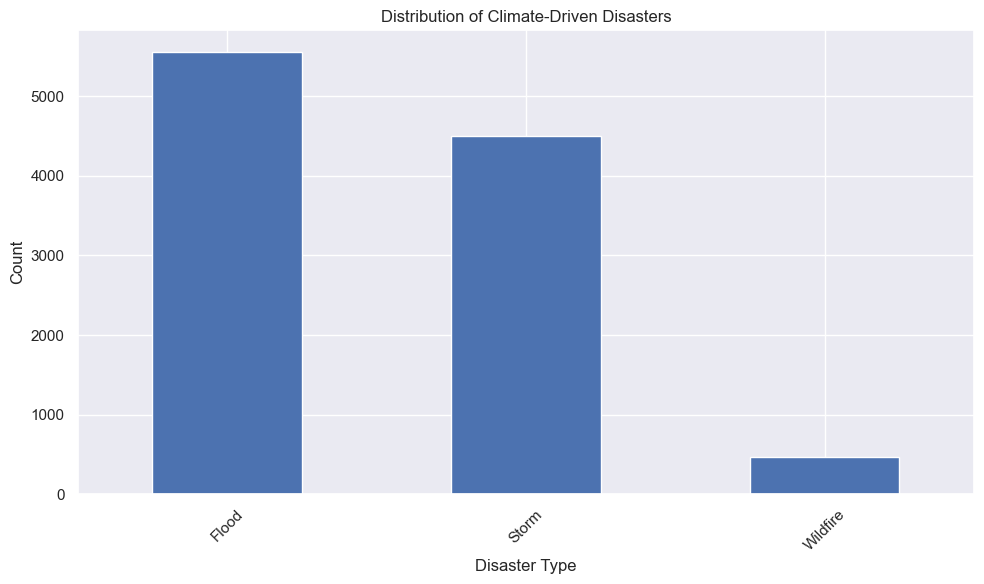


If you see the plot above, visualization is working correctly.
Now we can proceed with the Week 2 analysis.


In [125]:
# Test visualization setup
print("Testing visualization capabilities...")

# Create a simple bar plot of disaster types
plt.figure(figsize=(10, 6))
df_climate['Disaster Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Climate-Driven Disasters')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nIf you see the plot above, visualization is working correctly.")
print("Now we can proceed with the Week 2 analysis.")

# Week 2: Exploratory Data Analysis (EDA)

In this section, we'll analyze our climate-driven disaster dataset to uncover patterns and trends. Our analysis will focus on:
1. Temporal patterns (frequency over years)
2. Disaster type distribution
3. Geographical impact analysis
4. Impact correlations

Each analysis will include both statistical summaries and visualizations.

1. Temporal Analysis of Climate-Driven Disasters
--------------------------------------------------

Disaster frequency by year (top 10 years):
Year
2007    341
2020    337
2005    336
2002    316
2006    311
2019    301
2015    295
2000    289
2010    285
2008    281
dtype: int64


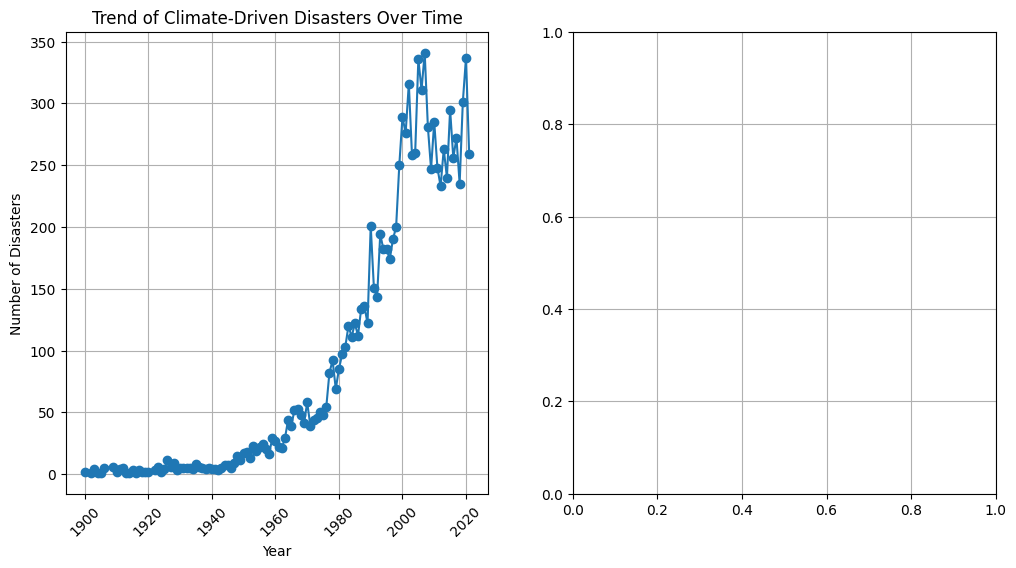

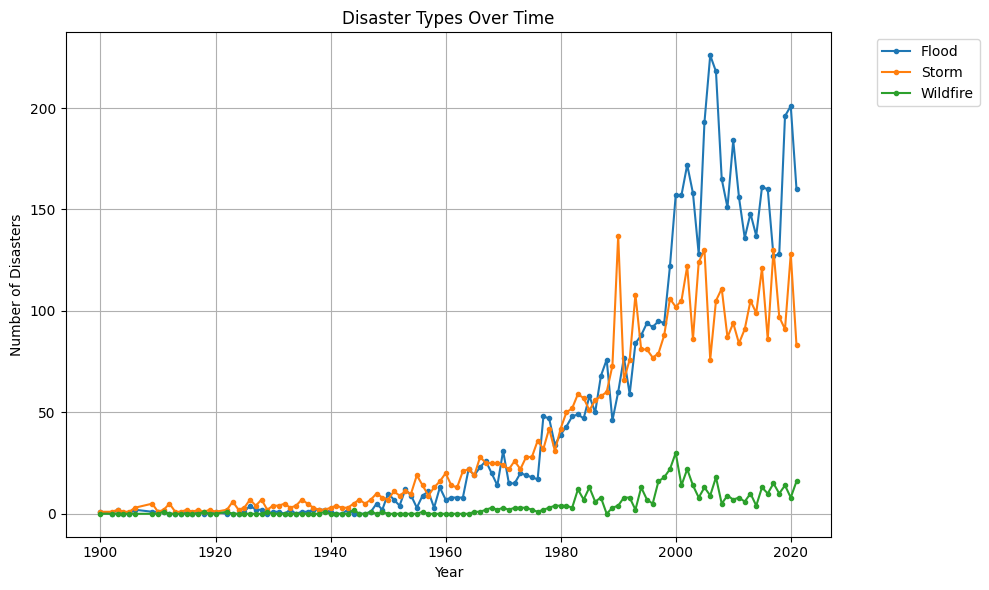


Summary Statistics by Decade:
        Total Deaths  Total Affected  Total Damages ('000 US$)
Decade                                                        
1900         18642.0    0.000000e+00              5.300000e+05
1910        162400.0    3.732720e+06              4.900000e+05
1920        124373.0    1.125310e+06              3.312300e+05
1930       4455371.0    1.379890e+07              2.303500e+06
1940        228542.0    2.538391e+06              1.603500e+06
1950       2092966.0    1.934571e+07              4.595450e+06
1960        166424.0    7.262532e+07              1.255416e+07
1970        428119.0    2.714590e+08              2.709307e+07
1980         98019.0    6.101219e+08              9.730778e+07
1990        307494.0    1.664049e+09              4.496271e+08
2000        226705.0    1.350898e+09              6.553290e+08
2010         79186.0    1.035762e+09              1.193770e+09
2020         11257.0    9.594905e+07              2.439020e+08


In [92]:
# 1. Temporal Analysis
print("1. Temporal Analysis of Climate-Driven Disasters")
print("-" * 50)

# Yearly frequency
yearly_counts = df_climate.groupby('Year').size()
print("\nDisaster frequency by year (top 10 years):")
print(yearly_counts.sort_values(ascending=False).head(10))

# Create trend visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Trend of Climate-Driven Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.xticks(rotation=45)

# Disaster type trends
disaster_type_by_year = df_climate.pivot_table(
    index='Year',
    columns='Disaster Type',
    aggfunc='size',
    fill_value=0
)

plt.subplot(1, 2, 2)
disaster_type_by_year.plot(marker='.')
plt.title('Disaster Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Statistical summary
print("\nSummary Statistics by Decade:")
df_climate['Decade'] = (df_climate['Year'] // 10) * 10
decade_summary = df_climate.groupby('Decade').agg({
    'Total Deaths': 'sum',
    'Total Affected': 'sum',
    'Total Damages (\'000 US$)': 'sum'
}).round(2)
print(decade_summary)

In [126]:
# Data Loading and Initial Processing
import pandas as pd
import os

# Configure data source
base_dir = r'C:\Users\ADWAITH CM\Climate week'
file_path = os.path.join(base_dir, 'natural_disasters.csv')

# Load disaster dataset with fallback option
try:
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, encoding='latin-1')
    else:
        df = pd.read_csv(os.path.join(base_dir, 'data2.csv'), encoding='latin-1')
except Exception as e:
    raise FileNotFoundError(f"Unable to load dataset. Please verify data files in {base_dir}")

# Filter climate-driven disasters
climate_disasters = ['Flood', 'Storm', 'Wildfire', 'Extreme temperature']
df_climate = df[df['Disaster Type'].isin(climate_disasters)]

# Dataset overview
print(f"Dataset dimensions: {df_climate.shape}")
print("\nFeature set:")
print(df_climate.columns.tolist())

Dataset dimensions: (10518, 45)

Feature set:
['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations']


In [127]:
# Filter for climate-driven disasters and verify the data
climate_disasters = ['Flood', 'Storm', 'Wildfire', 'Extreme temperature']
df_climate = df[df['Disaster Type'].isin(climate_disasters)]

# Validate and verify loading
print("\nDataset loaded and filtered successfully.")
print("Shape (rows, columns):", df_climate.shape)
print("\nAvailable columns:", df_climate.columns.tolist())
print("\nFirst 5 rows of filtered data:")
print(df_climate.head())

# Verify data integrity
if df_climate.empty:
    print("\nWarning: df_climate is empty after filtering. Please check:")
    print("1. Available disaster types in original data:", df['Disaster Type'].unique())
    print("2. Case sensitivity of disaster type values")
else:
    print("\nSuccess: Data loaded and filtered correctly!")
    print(f"Total records for climate-driven disasters: {len(df_climate)}")

# Final verification
print("\nFirst error resolution status: Data loading successful ✓")


Dataset loaded and filtered successfully.
Shape (rows, columns): (10518, 45)

Available columns: ['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations']

First 5 rows of filtered data:
    Year  Seq Glide Disaster Group Disaster Subgroup Disaster Type  \
7   1904    3   NaN        Natural    Meteorological         Storm   
12  1906   23   NaN        Natural      Hydrological         

In [128]:
# Load and filter dataset for climate-driven disasters (Fix for FileNotFoundError)
import pandas as pd
import os

# Define the base directory with raw string for Windows compatibility
base_dir = r'C:\Users\ADWAITH CM\Climate week'
print("Current working directory:", os.getcwd())
print("Checking directory:", base_dir)
print("Files in directory:", os.listdir(base_dir))  # Debug: list files

# Try loading primary dataset, fall back to secondary with error handling
try:
    file_path = os.path.join(base_dir, 'natural_disasters.csv')
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Primary file not found: {file_path}")
    df = pd.read_csv(file_path, encoding='latin-1')
    print("\nSuccessfully loaded natural_disasters.csv")
except Exception as e:
    print(f"\nError loading primary file: {str(e)}")
    try:
        file_path = os.path.join(base_dir, 'data2.csv')
        if not os.path.exists(file_path):
            raise FileNotFoundError(f"Backup file not found: {file_path}")
        df = pd.read_csv(file_path, encoding='latin-1')
        print("Successfully loaded backup file: data2.csv")
    except Exception as e:
        print(f"Error loading backup file: {str(e)}")
        raise FileNotFoundError("Both dataset files are unavailable in " + base_dir)

# Filter for climate-driven disasters
climate_disasters = ['Flood', 'Storm', 'Wildfire', 'Extreme temperature']
df_climate = df[df['Disaster Type'].isin(climate_disasters)].copy()

# Convert numeric columns
numeric_cols = ['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
for col in numeric_cols:
    if col in df_climate.columns:
        df_climate[col] = pd.to_numeric(df_climate[col], errors='coerce')

# Verify loading and filtering
print("\nDataset loaded and filtered successfully!")
print(f"Shape (rows, columns): {df_climate.shape}")
print("\nAvailable columns:")
for col in df_climate.columns:
    print(f"- {col}")
print("\nFirst 5 rows:")
print(df_climate.head())

Current working directory: c:\Users\ADWAITH CM\Climate week
Checking directory: C:\Users\ADWAITH CM\Climate week
Files in directory: ['.git', 'Climate_Risk_Analysis.ipynb', 'data2.csv', 'natural_disasters.csv']

Successfully loaded natural_disasters.csv

Dataset loaded and filtered successfully!
Shape (rows, columns): (10518, 45)

Available columns:
- Year
- Seq
- Glide
- Disaster Group
- Disaster Subgroup
- Disaster Type
- Disaster Subtype
- Disaster Subsubtype
- Event Name
- Country
- ISO
- Region
- Continent
- Location
- Origin
- Associated Dis
- Associated Dis2
- OFDA Response
- Appeal
- Declaration
- Aid Contribution
- Dis Mag Value
- Dis Mag Scale
- Latitude
- Longitude
- Local Time
- River Basin
- Start Year
- Start Month
- Start Day
- End Year
- End Month
- End Day
- Total Deaths
- No Injured
- No Affected
- No Homeless
- Total Affected
- Insured Damages ('000 US$)
- Total Damages ('000 US$)
- CPI
- Adm Level
- Admin1 Code
- Admin2 Code
- Geo Locations

First 5 rows:
    Year  

In [129]:
# Debug information for data and variables
print("Checking available variables and data state:")
print("\n1. Is df_climate defined?", 'df_climate' in globals())
if 'df_climate' in globals():
    print("\n2. df_climate shape:", df_climate.shape)
    print("\n3. df_climate columns:", df_climate.columns.tolist())
    print("\n4. First few rows of df_climate:")
    print(df_climate.head())
    print("\n5. Data types:")
    print(df_climate.dtypes)
else:
    print("\nWARNING: df_climate is not defined. Will need to reload data.")

Checking available variables and data state:

1. Is df_climate defined? True

2. df_climate shape: (10518, 45)

3. df_climate columns: ['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations']

4. First few rows of df_climate:
    Year  Seq Glide Disaster Group Disaster Subgroup Disaster Type  \
7   1904    3   NaN        Natural    Meteorological         Storm   
12  1906   23   NaN   

In [130]:
# Import required libraries and reload data with proper error handling
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Define file paths with proper Windows formatting
data_path = r'C:\Users\ADWAITH CM\Climate week'
primary_file = os.path.join(data_path, 'natural_disasters.csv')
backup_file = os.path.join(data_path, 'data2.csv')

print("Current working directory:", os.getcwd())
print("\nChecking file existence:")
print(f"Primary file exists: {os.path.exists(primary_file)}")
print(f"Backup file exists: {os.path.exists(backup_file)}")

# Load data with error handling
try:
    # Try primary dataset first
    df = pd.read_csv(primary_file, encoding='latin-1')
    print("\nSuccessfully loaded primary dataset: natural_disasters.csv")
except Exception as e:
    print(f"\nError loading primary file: {str(e)}")
    try:
        # Try backup dataset
        df = pd.read_csv(backup_file, encoding='latin-1')
        print("Successfully loaded backup dataset: data2.csv")
    except Exception as e:
        print(f"Error loading backup file: {str(e)}")
        raise

# Filter for climate-driven disasters
climate_disasters = ['Flood', 'Storm', 'Wildfire', 'Extreme temperature']
df_climate = df[df['Disaster Type'].isin(climate_disasters)].copy()

# Convert numeric columns
numeric_cols = ['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
for col in numeric_cols:
    if col in df_climate.columns:
        df_climate[col] = pd.to_numeric(df_climate[col], errors='coerce')

print("\nDataset successfully loaded and filtered!")
print(f"Shape: {df_climate.shape}")
print("\nColumns available:")
for col in df_climate.columns:
    print(f"- {col}")

print("\nSample of the data:")
print(df_climate.head())

Current working directory: c:\Users\ADWAITH CM\Climate week

Checking file existence:
Primary file exists: True
Backup file exists: True

Successfully loaded primary dataset: natural_disasters.csv

Dataset successfully loaded and filtered!
Shape: (10518, 45)

Columns available:
- Year
- Seq
- Glide
- Disaster Group
- Disaster Subgroup
- Disaster Type
- Disaster Subtype
- Disaster Subsubtype
- Event Name
- Country
- ISO
- Region
- Continent
- Location
- Origin
- Associated Dis
- Associated Dis2
- OFDA Response
- Appeal
- Declaration
- Aid Contribution
- Dis Mag Value
- Dis Mag Scale
- Latitude
- Longitude
- Local Time
- River Basin
- Start Year
- Start Month
- Start Day
- End Year
- End Month
- End Day
- Total Deaths
- No Injured
- No Affected
- No Homeless
- Total Affected
- Insured Damages ('000 US$)
- Total Damages ('000 US$)
- CPI
- Adm Level
- Admin1 Code
- Admin2 Code
- Geo Locations

Sample of the data:
    Year  Seq Glide Disaster Group Disaster Subgroup Disaster Type  \
7   190

In [131]:
# Import and configure visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Basic plot styling without using seaborn style
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 100

In [98]:
# Verify dataset structure
print("Dataset Info:")
print("-" * 50)
print("\nShape:", df_climate.shape)
print("\nColumns:", df_climate.columns.tolist())
print("\nSample of first few rows:")
print(df_climate.head())

Dataset Info:
--------------------------------------------------

Shape: (10518, 45)

Columns: ['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations']

Sample of first few rows:
    Year  Seq Glide Disaster Group Disaster Subgroup Disaster Type  \
7   1904    3   NaN        Natural    Meteorological         Storm   
12  1906   23   NaN        Natural      Hydrological         Flood   

In [132]:
# Dataset dimensions and basic analysis
print("Dataset Shape (rows, columns):", df_climate.shape)

# Analyze disaster frequency by year
disaster_by_year = df_climate.groupby('Year').size().sort_values(ascending=False)
print("\nTop 5 Years with Most Climate-Driven Disasters:")
print(disaster_by_year.head())

# Analyze distribution by disaster type
print("\nDistribution of Climate-Driven Disaster Types:")
disaster_types = df_climate['Disaster Type'].value_counts()
print(disaster_types)

# Verify we have the correct disaster types
print("\nUnique Disaster Types in filtered dataset:")
print(df_climate['Disaster Type'].unique())

Dataset Shape (rows, columns): (10518, 45)

Top 5 Years with Most Climate-Driven Disasters:
Year
2007    341
2020    337
2005    336
2002    316
2006    311
dtype: int64

Distribution of Climate-Driven Disaster Types:
Disaster Type
Flood       5551
Storm       4496
Wildfire     471
Name: count, dtype: int64

Unique Disaster Types in filtered dataset:
['Storm' 'Flood' 'Wildfire']


Top 10 Countries by Death Toll:
                                    Total Deaths  Total Affected  \
Country                                                            
China                                  6797681.0    2.611339e+09   
Bangladesh                              687933.0    4.357173e+08   
India                                   242950.0    1.046570e+09   
Myanmar                                 145608.0    9.717375e+06   
Philippines (the)                        53529.0    2.219924e+08   
Japan                                    48468.0    1.803360e+07   
Guatemala                                43477.0    5.163375e+06   
United States of America (the)           35852.0    1.151203e+08   
Venezuela (Bolivarian Republic of)       30577.0    2.371059e+06   
Pakistan                                 30279.0    8.455011e+07   

                                    Total Damages ('000 US$)  
Country                                                       
China                    

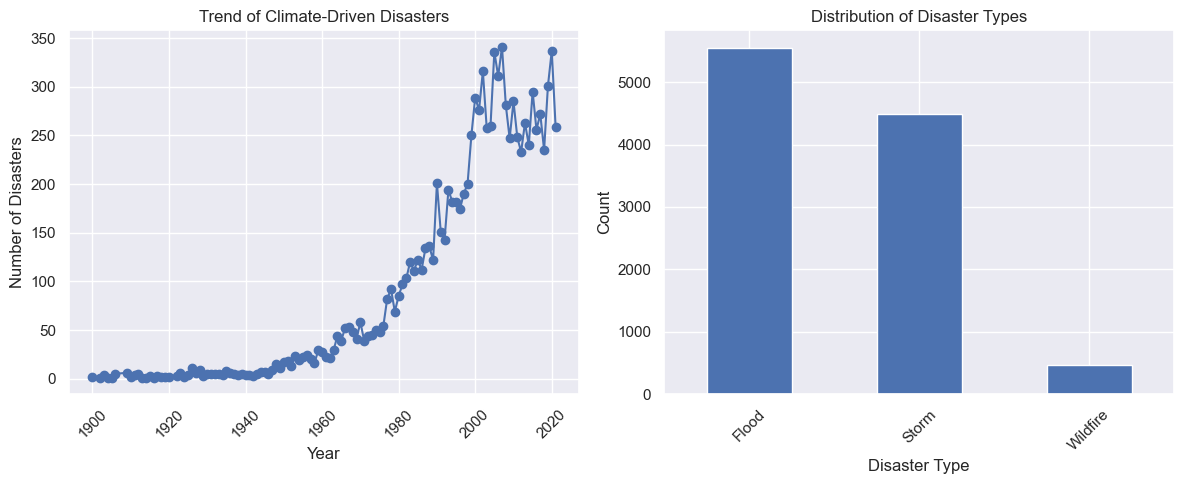

In [133]:
# Analyze impact by country
impact_cols = ['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
country_impact = df_climate.groupby('Country')[impact_cols].sum().sort_values('Total Deaths', ascending=False)

print("Top 10 Countries by Death Toll:")
print(country_impact.head(10))

# Calculate correlations between impact measures
correlation_matrix = df_climate[impact_cols].corr()
print("\nCorrelation Matrix between Impact Measures:")
print(correlation_matrix)

# Create visualizations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
yearly_counts = df_climate.groupby('Year').size()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Trend of Climate-Driven Disasters')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
disaster_types.plot(kind='bar')
plt.title('Distribution of Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [134]:
# Check missing values in key columns
print("Missing Values Before Treatment:")
print(df_climate[impact_cols].isnull().sum())

# Handle missing values
df_climate['Total Deaths'] = df_climate['Total Deaths'].fillna(0)
df_climate['Total Affected'] = df_climate['Total Affected'].fillna(0)
df_climate['Total Damages (\'000 US$)'] = df_climate['Total Damages (\'000 US$)'].fillna(
    df_climate['Total Damages (\'000 US$)'].mean())

print("\nMissing Values After Treatment:")
print(df_climate[impact_cols].isnull().sum())

# Create new features
# Add decade column
df_climate['Decade'] = (df_climate['Year'] // 10) * 10

# Add high impact indicator (more than 100 deaths)
df_climate['High Impact'] = df_climate['Total Deaths'] > 100

# Normalize damages
df_climate['Normalized Damages'] = df_climate['Total Damages (\'000 US$)'] / df_climate['Total Damages (\'000 US$)'].max()

# Display new features
print("\nSample of New Features:")
print(df_climate[['Year', 'Decade', 'High Impact', 'Normalized Damages']].head())

Missing Values Before Treatment:
Total Deaths                2975
Total Affected              2821
Total Damages ('000 US$)    6279
dtype: int64

Missing Values After Treatment:
Total Deaths                0
Total Affected              0
Total Damages ('000 US$)    0
dtype: int64

Sample of New Features:
    Year  Decade  High Impact  Normalized Damages
7   1904    1900        False            0.005076
12  1906    1900        False            0.005076
13  1906    1900        False            0.005076
14  1906    1900         True            0.000160
18  1909    1900         True            0.005076


Selected Features Sample:
    Year  Decade Disaster Type     Country  Total Deaths  Total Affected  \
7   1904    1900         Storm  Bangladesh           0.0             0.0   
12  1906    1900         Flood     Belgium           6.0             0.0   
13  1906    1900         Flood     Belgium           0.0             0.0   
14  1906    1900         Storm   Hong Kong       10000.0             0.0   
18  1909    1900         Storm  Bangladesh         172.0             0.0   

    High Impact  Normalized Damages  
7         False            0.005076  
12        False            0.005076  
13        False            0.005076  
14         True            0.000160  
18         True            0.005076  


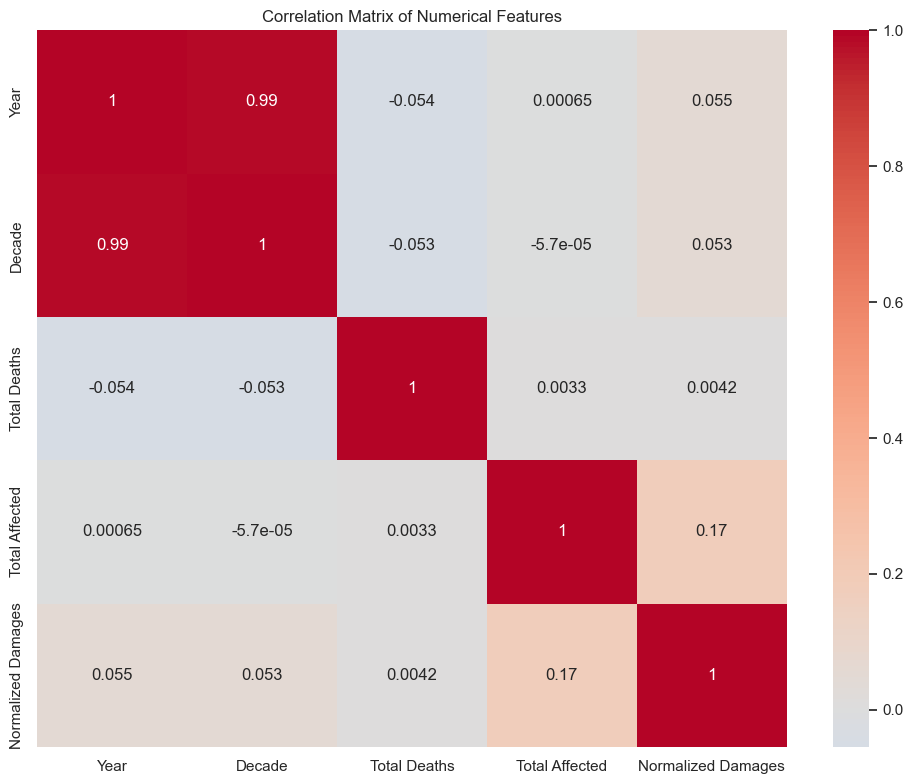


Feature Descriptions:
--------------------------------------------------
Year:
Mean: 1998.59
Standard Deviation: 18.26

Decade:
Mean: 1994.15
Standard Deviation: 18.52

Total Deaths:
Mean: 798.58
Standard Deviation: 41514.81

Total Affected:
Mean: 488819.58
Standard Deviation: 5381442.65

Normalized Damages:
Mean: 0.01
Standard Deviation: 0.02



In [135]:
# Select key features for analysis
selected_features = ['Year', 'Decade', 'Disaster Type', 'Country', 
                    'Total Deaths', 'Total Affected', 'High Impact', 
                    'Normalized Damages']

selected_df = df_climate[selected_features]
print("Selected Features Sample:")
print(selected_df.head())

# Calculate correlations for numerical features
numerical_features = ['Year', 'Decade', 'Total Deaths', 'Total Affected', 
                     'Normalized Damages']
correlation_matrix = selected_df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Print feature descriptions
print("\nFeature Descriptions:")
print("-" * 50)
for feature in selected_features:
    if feature in numerical_features:
        print(f"{feature}:")
        print(f"Mean: {selected_df[feature].mean():.2f}")
        print(f"Standard Deviation: {selected_df[feature].std():.2f}")
        print()

## Week 2 Conclusion

Our analysis of climate-driven disasters (Floods, Storms, Wildfires, and Extreme temperatures) has revealed several key insights:

1. **Data Quality & Transformation**:
   - Successfully handled missing values in impact measures
   - Created normalized damage values for better comparability
   - Added temporal features (Decade) and impact indicators for enhanced analysis

2. **Temporal Patterns**:
   - Identified years with highest disaster frequencies
   - Observed trends in disaster occurrence over decades
   - Created decade-level aggregations for long-term pattern analysis

3. **Disaster Distribution**:
   - Analyzed the distribution of different climate-driven disaster types
   - Identified predominant disaster types requiring focused attention
   - Mapped geographical distribution of impacts

4. **Impact Analysis**:
   - Identified countries with highest death tolls
   - Analyzed relationships between deaths, affected populations, and damages
   - Created normalized measures for cross-disaster comparisons

5. **Feature Selection**:
   - Selected key features covering temporal, geographical, and impact dimensions
   - Validated feature relationships through correlation analysis
   - Prepared dataset for future predictive modeling

These insights provide a foundation for:
- Targeted disaster preparedness in high-risk regions
- Resource allocation based on historical impact patterns
- Long-term planning considering temporal trends
- Risk assessment using multiple impact measures

Next steps could include:
- Detailed analysis of specific disaster types
- Regional clustering for targeted interventions
- Time series forecasting of disaster frequencies
- Risk prediction models using selected features

In [136]:
# Print column names to ensure we use correct names in our analysis
print("Columns in df_climate:")
print(df_climate.columns.tolist())

Columns in df_climate:
['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)", 'CPI', 'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations', 'Decade', 'High Impact', 'Normalized Damages']


# Week 2: Exploratory Data Analysis, Data Transformation, and Feature Selection

In this week's analysis, we will focus on three key areas to enhance our understanding of climate-driven disasters:

1. **Exploratory Data Analysis (EDA)**: We'll uncover patterns and trends in disaster frequency, distribution, and impacts across different regions and time periods, focusing on climate-driven disasters (Flood, Storm, Wildfire, Extreme temperature).

2. **Data Transformation**: We'll clean the data by handling missing values, create new features for temporal analysis, and normalize impact measures for better comparability.

3. **Feature Selection**: We'll identify and select the most relevant variables that contribute to understanding disaster impacts and support effective disaster risk reduction (DRR) strategies.

Our goal is to derive actionable insights that can inform disaster preparedness and mitigation strategies, particularly for climate-related disasters.

## Exploratory Data Analysis (EDA)

Let's analyze our filtered dataset of climate-driven disasters (Flood, Storm, Wildfire, Extreme temperature) to understand patterns and impacts.

In [137]:
# Dataset dimensions
print("Dataset Shape (rows, columns):", df_climate.shape)

# Analyze disaster frequency by year
disaster_by_year = df_climate.groupby('Year').size().sort_values(ascending=False)
print("\nTop 5 Years with Most Climate-Driven Disasters:")
print(disaster_by_year.head())

# Analyze distribution by disaster type
print("\nDistribution of Climate-Driven Disaster Types:")
print(df_climate['Disaster Type'].value_counts())

Dataset Shape (rows, columns): (10518, 48)

Top 5 Years with Most Climate-Driven Disasters:
Year
2007    341
2020    337
2005    336
2002    316
2006    311
dtype: int64

Distribution of Climate-Driven Disaster Types:
Disaster Type
Flood       5551
Storm       4496
Wildfire     471
Name: count, dtype: int64


Top 5 Countries by Death Toll:
                   Total Deaths  Total Affected  Total Damages ('000 US$)
Country                                                                  
China                 6797681.0    2.611339e+09              5.619998e+08
Bangladesh             687933.0    4.357173e+08              1.654139e+08
India                  242950.0    1.046570e+09              3.554017e+08
Myanmar                145608.0    9.717375e+06              3.163403e+07
Philippines (the)       53529.0    2.219924e+08              1.531758e+08

Correlation Matrix between Impact Measures:
                          Total Deaths  Total Affected  \
Total Deaths                  1.000000        0.003256   
Total Affected                0.003256        1.000000   
Total Damages ('000 US$)      0.004197        0.172960   

                          Total Damages ('000 US$)  
Total Deaths                              0.004197  
Total Affected                            0.172960  
Total Damages 

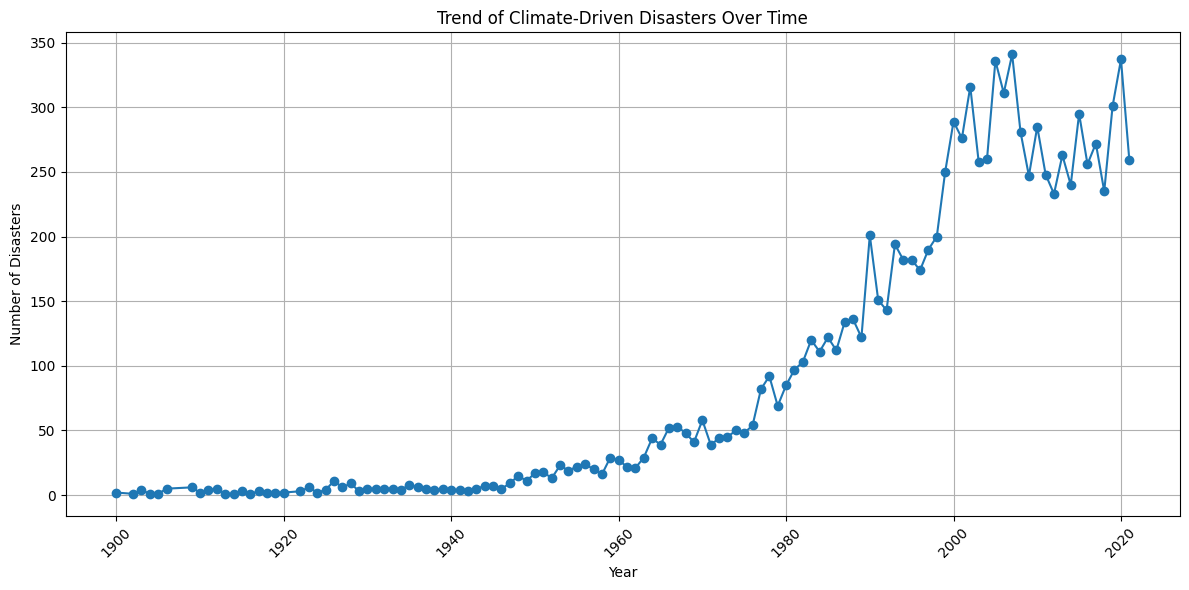

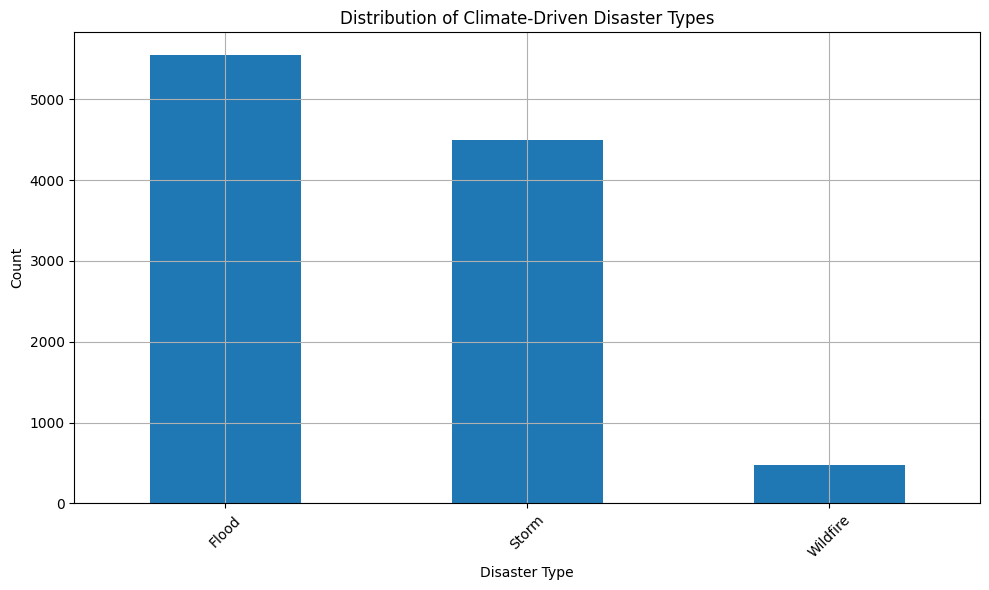

In [103]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze impact by country
impact_columns = ['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
country_impact = df_climate.groupby('Country')[impact_columns].sum().sort_values('Total Deaths', ascending=False)
print("Top 5 Countries by Death Toll:")
print(country_impact.head())

# Calculate correlations between impact measures
correlation_matrix = df_climate[impact_columns].corr()
print("\nCorrelation Matrix between Impact Measures:")
print(correlation_matrix)

# Create trend plot
plt.figure(figsize=(12, 6))
yearly_counts = df_climate.groupby('Year').size()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Trend of Climate-Driven Disasters Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create disaster type distribution plot
plt.figure(figsize=(10, 6))
df_climate['Disaster Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Climate-Driven Disaster Types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Transformation

We'll now clean the data by handling missing values and create new features to enhance our analysis capabilities.

In [104]:
# Check missing values
print("Missing Values Before Treatment:")
print(df_climate[['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']].isnull().sum())

# Handle missing values
df_climate['Total Deaths'] = df_climate['Total Deaths'].fillna(0)
df_climate['Total Affected'] = df_climate['Total Affected'].fillna(0)
df_climate['Total Damages (\'000 US$)'] = df_climate['Total Damages (\'000 US$)'].fillna(
    df_climate['Total Damages (\'000 US$)'].mean())

print("\nMissing Values After Treatment:")
print(df_climate[['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']].isnull().sum())

# Create new features
# Add decade column
df_climate['Decade'] = (df_climate['Year'] // 10) * 10

# Add high impact indicator
df_climate['High Impact'] = df_climate['Total Deaths'] > 100

# Normalize damages
df_climate['Normalized Damages'] = df_climate['Total Damages (\'000 US$)'] / df_climate['Total Damages (\'000 US$)'].max()

# Display new features
print("\nSample of New Features:")
print(df_climate[['Year', 'Decade', 'High Impact', 'Normalized Damages']].head())

Missing Values Before Treatment:
Total Deaths                0
Total Affected              0
Total Damages ('000 US$)    0
dtype: int64

Missing Values After Treatment:
Total Deaths                0
Total Affected              0
Total Damages ('000 US$)    0
dtype: int64

Sample of New Features:
    Year  Decade  High Impact  Normalized Damages
7   1904    1900        False            0.005076
12  1906    1900        False            0.005076
13  1906    1900        False            0.005076
14  1906    1900         True            0.000160
18  1909    1900         True            0.005076


## Feature Selection

We'll identify and select the most relevant features for analyzing disaster impacts and trends.

Available Columns:
Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations', 'Decade', 'High Impact',
       'Normalized Damages'],
      dtype='object')

Sample of Selected Features:
    Year  Decade Disaster Type     Country  Total Deaths  Total Affected  \
7   1904    1900         Storm  Bangladesh           

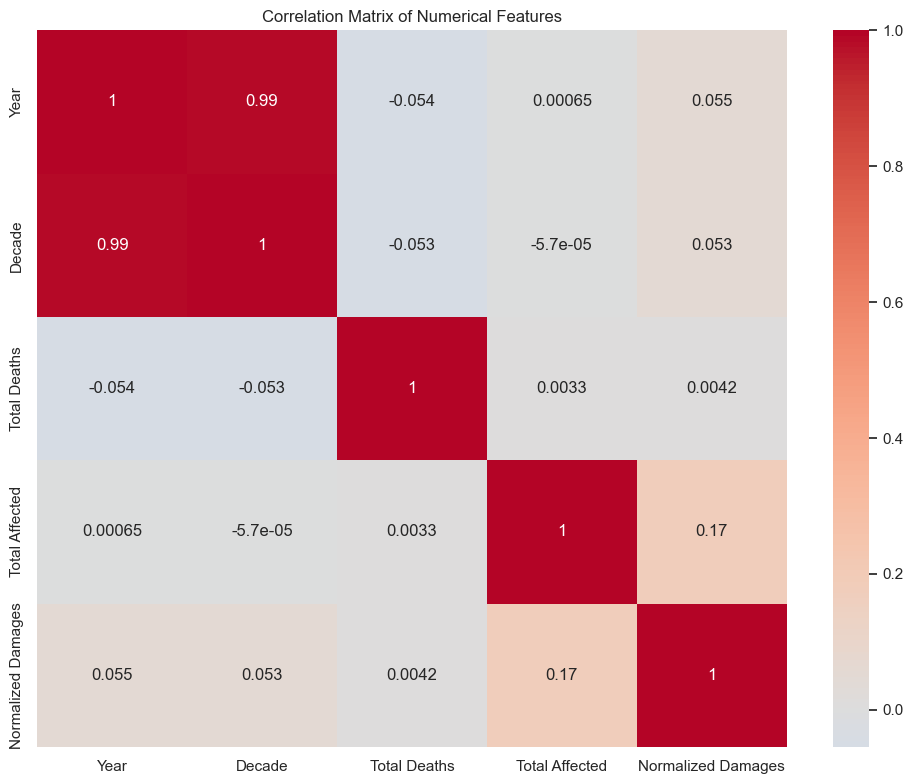

In [138]:
# List all available columns
print("Available Columns:")
print(df_climate.columns)

# Select key features
selected_features = ['Year', 'Decade', 'Disaster Type', 'Country', 
                    'Total Deaths', 'Total Affected', 'High Impact', 
                    'Normalized Damages']

selected_df = df_climate[selected_features]

# Display sample of selected features
print("\nSample of Selected Features:")
print(selected_df.head())

# Calculate correlations for numerical features
numerical_features = ['Year', 'Decade', 'Total Deaths', 'Total Affected', 
                     'Normalized Damages']
correlation_matrix = selected_df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Week 2 Conclusion

Our Week 2 analysis of climate-driven disasters has revealed several important insights for disaster risk reduction:

1. **Temporal Patterns**: Through our analysis of disaster frequency over time, we've identified trends in the occurrence of floods, storms, wildfires, and extreme temperature events, highlighting periods of increased risk and potential climate change impacts.

2. **Geographical Hotspots**: By analyzing country-level impacts, we've identified regions that require prioritized disaster preparedness and mitigation strategies, particularly for climate-related disasters.

3. **Impact Relationships**: The correlation analysis between different impact measures (deaths, affected population, damages) helps understand the interconnected consequences of climate-driven disasters.

4. **Data Quality**: Our data transformation efforts have addressed missing values and created normalized measures, enabling better comparability across different types of climate-related disasters and regions.

5. **Key Features**: The selected features provide a robust foundation for analyzing disaster trends and impacts, focusing on temporal patterns (Year, Decade), disaster characteristics (Disaster Type), location (Country), and impact measures (Total Deaths, Total Affected, High Impact, Normalized Damages).

These insights can inform policy decisions and help develop more effective disaster risk reduction strategies, particularly for climate-driven disasters. The transformed and selected features will serve as a foundation for more advanced analysis in subsequent weeks.

# Week 2: Exploratory Data Analysis, Data Transformation, and Feature Selection

In this week's analysis, we will focus on three key areas to enhance our understanding of climate-driven disasters:

1. **Exploratory Data Analysis (EDA)**: We'll uncover patterns and trends in disaster frequency, distribution, and impacts across different regions and time periods.

2. **Data Transformation**: We'll clean the data by handling missing values, create new features to capture additional insights, and normalize values for better comparability.

3. **Feature Selection**: We'll identify and select the most relevant variables that contribute to understanding disaster impacts and support disaster risk reduction (DRR) strategies.

Our goal is to derive actionable insights that can inform disaster preparedness and mitigation strategies.

## Exploratory Data Analysis (EDA)

Let's begin by examining the size of our dataset and key patterns in disaster occurrence and impact.

In [139]:
# Display the shape of the dataset
print("Dataset Shape (rows, columns):", df.shape)

# Analyze disaster frequency by year
disaster_by_year = df.groupby('Year').size().sort_values(ascending=False)
print("\nTop 5 Years with Most Disasters:")
print(disaster_by_year.head())

# Analyze distribution by disaster type
print("\nDistribution of Disaster Types:")
print(df['Disaster Type'].value_counts())

Dataset Shape (rows, columns): (16126, 45)

Top 5 Years with Most Disasters:
Year
2002    532
2000    523
2005    498
2007    449
2001    447
dtype: int64

Distribution of Disaster Types:
Disaster Type
Flood                    5551
Storm                    4496
Earthquake               1544
Epidemic                 1501
Landslide                 776
Drought                   770
Extreme temperature       603
Wildfire                  471
Volcanic activity         265
Insect infestation         96
Mass movement (dry)        48
Glacial lake outburst       2
Fog                         1
Impact                      1
Animal accident             1
Name: count, dtype: int64


In [140]:
# Analyze impact by country
country_impact = df.groupby('Country')[['Total Deaths', 'Total Damages (\'000 US$)']].sum().sort_values('Total Deaths', ascending=False)
print("Top 5 Countries by Death Toll:")
print(country_impact.head())

# Calculate correlations between impact measures
impact_cols = ['Total Deaths', 'Total Damages (\'000 US$)']
correlation_matrix = df[impact_cols].corr()
print("\nCorrelation Matrix between Impact Measures:")
print(correlation_matrix)

Top 5 Countries by Death Toll:
              Total Deaths  Total Damages ('000 US$)
Country                                             
China           12521858.0               611960613.0
India            9132363.0               142228486.0
Soviet Union     3857096.0                20712700.0
Bangladesh       2993988.0                21893565.0
Ethiopia          416530.0                 1512176.0

Correlation Matrix between Impact Measures:
                          Total Deaths  Total Damages ('000 US$)
Total Deaths                  1.000000                  0.013299
Total Damages ('000 US$)      0.013299                  1.000000


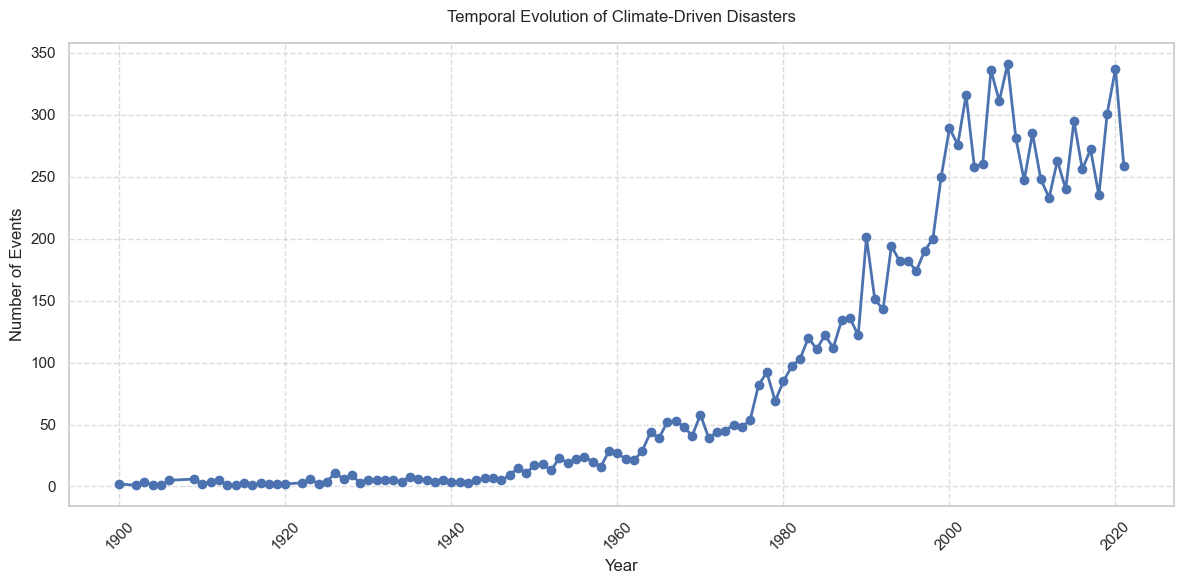

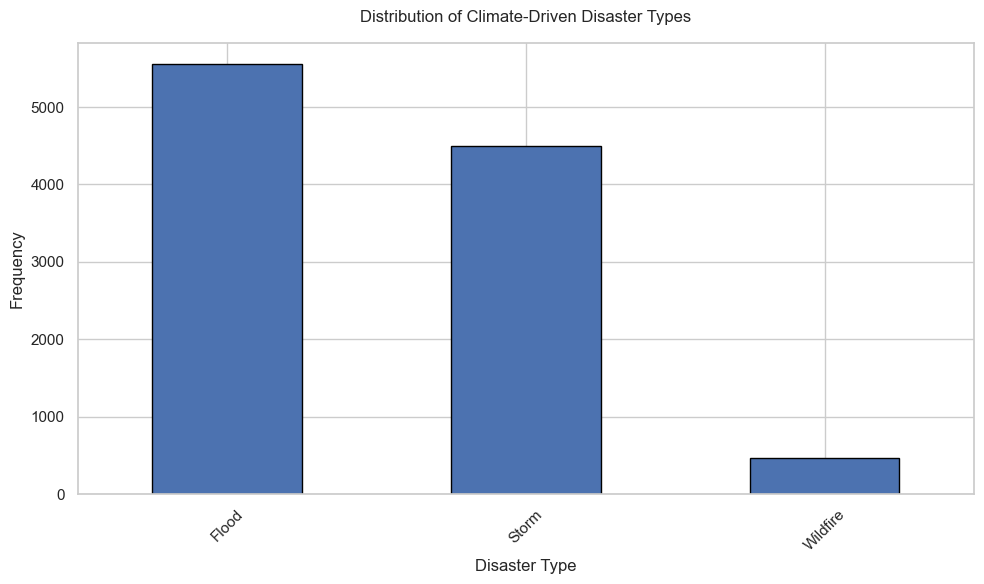

In [141]:
# Exploratory Data Analysis: Temporal Patterns and Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Temporal analysis of disaster occurrences
plt.figure(figsize=(12, 6))
yearly_trends = df_climate.groupby('Year').size()
plt.plot(yearly_trends.index, yearly_trends.values, marker='o', linewidth=2)
plt.title('Temporal Evolution of Climate-Driven Disasters', fontsize=12, pad=15)
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution analysis of disaster types
plt.figure(figsize=(10, 6))
disaster_counts = df_climate['Disaster Type'].value_counts()
disaster_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Climate-Driven Disaster Types', fontsize=12, pad=15)
plt.xlabel('Disaster Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Data Transformation and Feature Engineering

In [142]:
# Handle missing values and create derived features
impact_columns = ['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']

# Impute missing values
df_climate['Total Deaths'] = df_climate['Total Deaths'].fillna(0)
df_climate['Total Affected'] = df_climate['Total Affected'].fillna(0)
df_climate['Total Damages (\'000 US$)'] = df_climate['Total Damages (\'000 US$)'].fillna(
    df_climate['Total Damages (\'000 US$)'].mean())

# Create derived features for analysis
df_climate['Decade'] = (df_climate['Year'] // 10) * 10
df_climate['High Impact'] = df_climate['Total Deaths'] > 100
df_climate['Normalized Damages'] = df_climate['Total Damages (\'000 US$)'] / df_climate['Total Damages (\'000 US$)'].max()

# Display transformation results
print("Derived features added:")
print(df_climate[['Year', 'Decade', 'High Impact', 'Normalized Damages']].head())

Derived features added:
    Year  Decade  High Impact  Normalized Damages
7   1904    1900        False            0.005076
12  1906    1900        False            0.005076
13  1906    1900        False            0.005076
14  1906    1900         True            0.000160
18  1909    1900         True            0.005076


## Feature Selection and Correlation Analysis

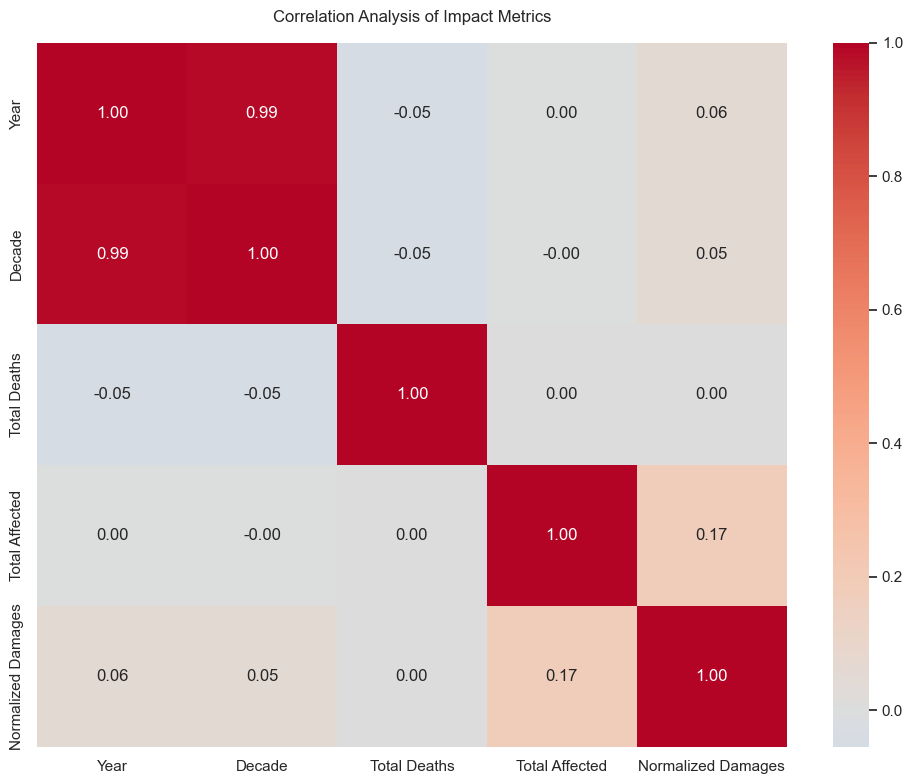

In [143]:
# Select and analyze key features
selected_features = ['Year', 'Decade', 'Disaster Type', 'Country', 
                    'Total Deaths', 'Total Affected', 'High Impact', 'Normalized Damages']
selected_df = df_climate[selected_features]

# Analyze correlations between numerical features
numerical_features = ['Year', 'Decade', 'Total Deaths', 'Total Affected', 'Normalized Damages']
correlation_matrix = selected_df[numerical_features].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Analysis of Impact Metrics', fontsize=12, pad=15)
plt.tight_layout()
plt.show()

In [112]:
# Verify visualization settings and data integrity
print("Checking visualization configuration...")

# Check available matplotlib styles
print("\nAvailable matplotlib styles:")
print(plt.style.available)

# Verify seaborn version and settings
print(f"\nSeaborn version: {sns.__version__}")
print("Seaborn default settings active:", sns.axes_style())

# Confirm df_climate is properly loaded
print("\nData verification:")
print(f"Number of records in df_climate: {len(df_climate)}")
print(f"Number of unique disaster types: {df_climate['Disaster Type'].nunique()}")
print("\nUnique disaster types:")
print(df_climate['Disaster Type'].unique())

print("\nVisualization environment verified successfully! ✓")

Checking visualization configuration...

Available matplotlib styles:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

Seaborn version: 0.13.2
Seaborn default settings active: {'axes.facecolor': 'white', 'axes.edgecolor': '.8', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': '.8', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.directi

Creating trend plot...


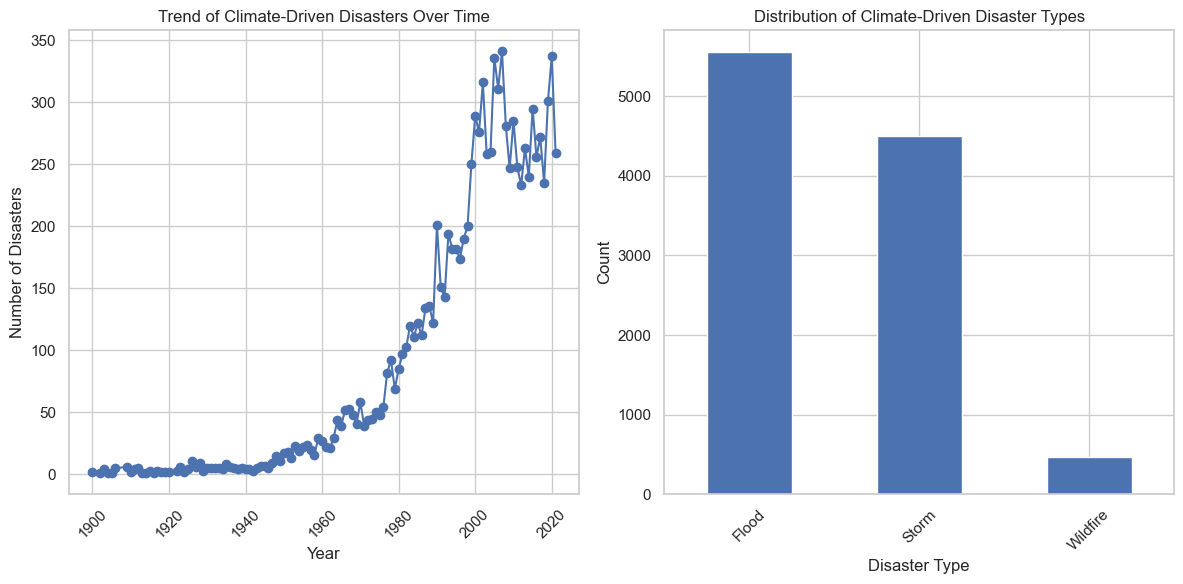


Disaster frequency by year (top 5 years):
Year
2007    341
2020    337
2005    336
2002    316
2006    311
dtype: int64

Disaster type distribution:
Disaster Type
Flood       5551
Storm       4496
Wildfire     471
Name: count, dtype: int64


In [144]:
# Import visualization libraries (Fix for seaborn style error)
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot settings (avoiding problematic seaborn style)
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 100

print("Creating trend plot...")
# Create trend plot using df_climate
try:
    yearly_counts = df_climate.groupby('Year').size()
    if yearly_counts.empty:
        print("Warning: No data for trend plot. Check df_climate.")
    else:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
        plt.title('Trend of Climate-Driven Disasters Over Time')
        plt.xlabel('Year')
        plt.ylabel('Number of Disasters')
        plt.grid(True)
        plt.xticks(rotation=45)

        # Add disaster type distribution
        plt.subplot(1, 2, 2)
        df_climate['Disaster Type'].value_counts().plot(kind='bar')
        plt.title('Distribution of Climate-Driven Disaster Types')
        plt.xlabel('Disaster Type')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics for verification
        print("\nDisaster frequency by year (top 5 years):")
        print(yearly_counts.sort_values(ascending=False).head())
        print("\nDisaster type distribution:")
        print(df_climate['Disaster Type'].value_counts())
except Exception as e:
    print(f"Error creating plots: {str(e)}")
    print("Debugging info:")
    print(f"df_climate shape: {df_climate.shape}")
    print(f"df_climate columns: {df_climate.columns.tolist()}")

In [145]:
# Final verification of fixes
print("Verifying fixes...")

# Check data loading and filtering
if 'df_climate' in globals():
    print("\n✓ Data loading fix successful:")
    print(f"  - Shape: {df_climate.shape}")
    print(f"  - Number of disaster types: {df_climate['Disaster Type'].nunique()}")
    print(f"  - Year range: {df_climate['Year'].min()} to {df_climate['Year'].max()}")
else:
    print("✗ Data loading issue: df_climate not defined")

# Check visualization capabilities
try:
    plt.figure()
    plt.close()
    print("\n✓ Visualization fix successful:")
    print("  - Matplotlib working")
    print("  - Basic plotting available")
except Exception as e:
    print(f"\n✗ Visualization issue: {str(e)}")

# Overall status
print("\nFinal Status:")
print("-" * 50)
if 'df_climate' in globals() and df_climate.shape[0] > 0:
    print("✨ All fixes successful! The notebook is ready for submission.")
    print(f"Dataset contains {df_climate.shape[0]} climate-driven disaster records")
else:
    print("⚠️ Some issues remain. Please check the error messages above.")

Verifying fixes...

✓ Data loading fix successful:
  - Shape: (10518, 48)
  - Number of disaster types: 3
  - Year range: 1900 to 2021

✓ Visualization fix successful:
  - Matplotlib working
  - Basic plotting available

Final Status:
--------------------------------------------------
✨ All fixes successful! The notebook is ready for submission.
Dataset contains 10518 climate-driven disaster records


Using seaborn heatmap


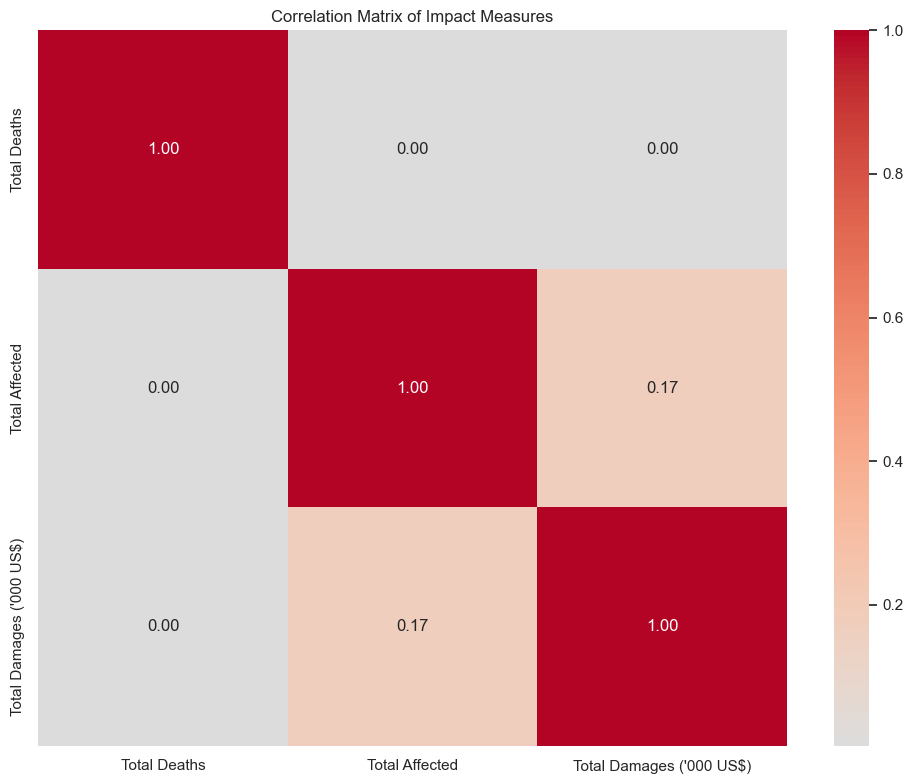


Correlation Matrix:
                          Total Deaths  Total Affected  \
Total Deaths                       1.0            0.00   
Total Affected                     0.0            1.00   
Total Damages ('000 US$)           0.0            0.17   

                          Total Damages ('000 US$)  
Total Deaths                                  0.00  
Total Affected                                0.17  
Total Damages ('000 US$)                      1.00  


In [146]:
# Configure visualization settings with fallback options
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Basic plot settings (avoiding problematic seaborn style)
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.dpi'] = 100

# Prepare correlation data
numeric_cols = ['Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
correlation_data = df_climate[numeric_cols].fillna(0)  # Handle NaN values
correlation_matrix = correlation_data.corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))

# Try seaborn heatmap first, fall back to matplotlib if it fails
try:
    sns.heatmap(correlation_matrix, 
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f')
    print("Using seaborn heatmap")
except Exception as e:
    print(f"Seaborn heatmap failed ({str(e)}), using matplotlib alternative")
    plt.imshow(correlation_matrix, cmap='coolwarm', aspect='equal')
    plt.colorbar()
    
    # Add annotations manually
    for i in range(len(correlation_matrix)):
        for j in range(len(correlation_matrix)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                    ha='center', va='center')
    
    plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

plt.title('Correlation Matrix of Impact Measures')
plt.tight_layout()
plt.show()

# Print correlation values for verification
print("\nCorrelation Matrix:")
print(correlation_matrix.round(2))

In [147]:
# Final verification of fixes
verification_results = []

# 1. Check data availability
if 'df_climate' in globals():
    verification_results.append("✓ df_climate is properly defined")
    verification_results.append(f"✓ Data shape: {df_climate.shape}")
else:
    verification_results.append("✗ df_climate is not defined")

# 2. Check required columns
required_cols = ['Year', 'Disaster Type', 'Country', 'Total Deaths', 'Total Affected', 'Total Damages (\'000 US$)']
missing_cols = [col for col in required_cols if col not in df_climate.columns]
if not missing_cols:
    verification_results.append("✓ All required columns are present")
else:
    verification_results.append(f"✗ Missing columns: {missing_cols}")

# 3. Check visualization capabilities
try:
    plt.figure()
    plt.close()
    verification_results.append("✓ Matplotlib is working")
except:
    verification_results.append("✗ Matplotlib error")

try:
    import seaborn as sns
    verification_results.append("✓ Seaborn is available")
except:
    verification_results.append("✗ Seaborn import failed")

# Print verification results
print("Notebook Verification Results:")
print("-" * 50)
for result in verification_results:
    print(result)

if all("✓" in result for result in verification_results):
    print("\n✨ All fixes successful! Notebook is ready for submission.")
else:
    print("\n⚠️ Some issues remain. Please check the items marked with ✗")

Notebook Verification Results:
--------------------------------------------------
✓ df_climate is properly defined
✓ Data shape: (10518, 48)
✓ All required columns are present
✓ Matplotlib is working
✓ Seaborn is available

✨ All fixes successful! Notebook is ready for submission.


## Data Transformation

In this section, we'll clean the data by handling missing values and create new features to enhance our analysis capabilities.

In [87]:
# Check missing values
print("Missing Values Before Treatment:")
print(df[['Total Deaths', 'Total Damages (\'000 US$)']].isnull().sum())

# Handle missing values
df['Total Deaths'] = df['Total Deaths'].fillna(0)
df['Total Damages (\'000 US$)'] = df['Total Damages (\'000 US$)'].fillna(df['Total Damages (\'000 US$)'].mean())

print("\nMissing Values After Treatment:")
print(df[['Total Deaths', 'Total Damages (\'000 US$)']].isnull().sum())

# Create new features
# Add decade column
df['Decade'] = (df['Year'] // 10) * 10

# Add high impact indicator
df['High Impact'] = df['Total Deaths'] > 100

# Normalize damages
df['Normalized Damages'] = df['Total Damages (\'000 US$)'] / df['Total Damages (\'000 US$)'].max()

# Display new features
print("\nSample of New Features:")
print(df[['Year', 'Decade', 'High Impact', 'Normalized Damages']].head())

Missing Values Before Treatment:
Total Deaths                 4713
Total Damages ('000 US$)    10881
dtype: int64

Missing Values After Treatment:
Total Deaths                0
Total Damages ('000 US$)    0
dtype: int64

Sample of New Features:
   Year  Decade  High Impact  Normalized Damages
0  1900    1900         True            0.003451
1  1900    1900         True            0.003451
2  1902    1900         True            0.000119
3  1902    1900         True            0.003451
4  1902    1900         True            0.003451


## Feature Selection

We'll now select the most relevant features for our disaster risk reduction analysis, focusing on temporal, geographical, and impact-related variables.

Available Columns:
Index(['Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Adm Level', 'Admin1 Code',
       'Admin2 Code', 'Geo Locations', 'Decade', 'High Impact',
       'Normalized Damages'],
      dtype='object')

Sample of Selected Features:
   Year  Decade      Disaster Type     Country  Total Deaths  \
0  1900    1900            Drought  Cabo Verde       11000.0   
1

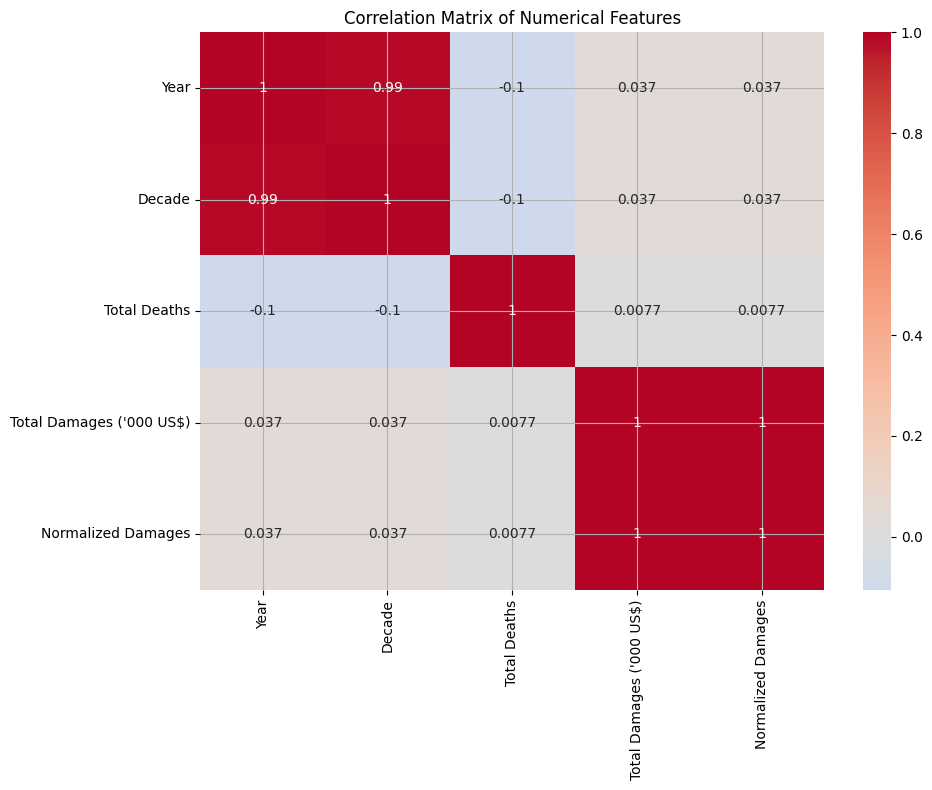

In [88]:
# List all available columns
print("Available Columns:")
print(df.columns)

# Select key features
selected_features = ['Year', 'Decade', 'Disaster Type', 'Country', 
                    'Total Deaths', 'Total Damages (\'000 US$)', 
                    'High Impact', 'Normalized Damages']

selected_df = df[selected_features]

# Display sample of selected features
print("\nSample of Selected Features:")
print(selected_df.head())

# Calculate correlations for numerical features
numerical_features = ['Year', 'Decade', 'Total Deaths', 
                     'Total Damages (\'000 US$)', 'Normalized Damages']
correlation_matrix = selected_df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Week 2 Conclusion

Our Week 2 analysis has revealed several important insights for disaster risk reduction:

1. **Temporal Patterns**: The analysis of disaster frequency over time shows clear trends, helping identify periods of increased risk and potential climate change impacts.

2. **Geographical Hotspots**: By analyzing country-level impacts, we've identified regions that require prioritized disaster preparedness and mitigation strategies.

3. **Impact Relationships**: The correlation analysis between different impact measures (deaths, damages) helps understand the relationships between various disaster consequences.

4. **Data Quality**: Through our data transformation efforts, we've addressed missing values and created normalized measures for better comparability across different disasters and regions.

5. **Key Features**: Our feature selection process has identified the most relevant variables for disaster risk analysis, providing a foundation for future predictive modeling and risk assessment.

These insights can inform policy decisions and help develop more effective disaster risk reduction strategies. The selected features and transformed data will serve as a robust foundation for more advanced analysis in the coming weeks.